- data = boston.sort_values(['crim'], ascending=False): 범죄율(crim) 내림차순 정렬
- data.reset_index(drop=True, inplace=True): 정렬 데이터 새로 인덱싱
- data.crim.iloc[0:10].values: 상위 10개 지역 범죄율
- data['crim'].iloc[0:10] = gap: 상위 10개 지역 범죄율을 10번째 범죄율로 대체
- data[data['age']>=80].crim.mean(): 1940년 이전 주택비율 80% 이상인 지역 평균 범죄율

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
boston = pd.read_csv('/content/drive/MyDrive/work/Boston.csv', index_col=0)
print(boston.head())
print(boston.describe)
print(boston.shape)
print(boston.info())
print(boston.dtypes)

print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
data = boston.sort_values(['crim'], ascending=False)
data.reset_index(drop=True, inplace=True)
print('범죄율 상위 10개 지역 데이터')
print(data.iloc[0:10])
print('범죄율 상위 10개 지역의 범죄율')
print(data.crim.iloc[0:10].values)
gap = data.crim.iloc[0:10].values[9]
print('상위 10번째 범죄율: ', end=''); print(gap)
data['crim'].iloc[0:10] = gap
print('상위 10개 지역 범죄율을 10번째 범죄율을 대체후 데이터')
print(data.iloc[0:10])

print('1940년 이전 주택비율 항목(age)이 80%이상인 지역에 대한 평균 범죄율(%): ', end='')
print(data[data['age']>=80].crim.mean())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  
<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671 

<ipython-input-3-d2651d05228c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['crim'].iloc[0:10] = gap


- data1 = house.iloc[0:int(n)]: 전체 중 80%의 행(16,512개 행) 자료 저장
- data2 = data1.dropna(subset=['total_bedrooms']): 결측값이 있는 행 삭제
- data2['total_bedrooms'].std(): 표준편차(중앙값 대체 전), 판다스(표본 표준편차, n-1로 나눔)
- np.std(data2['total_bedrooms']: 표준편차(중앙값 대체 전), 넘파이(모표준편차, n으로 나눔)
- data1['total_bedrooms'] = data1['total_bedrooms'].fillna(mediangap): 결측값을 중앙값으로 대체
- data1['total_bedrooms'].std(): 표준편차(중앙값 대체 후), 판다스(표본 표준편차, n-1로 나눔)

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
house = pd.read_csv('/content/drive/MyDrive/work/housing.csv', index_col=0)
print(house.head())
print(house.describe)
print(house.shape)
print(house.info())
print(house.dtypes)
n = 0.8 * house.shape[0]
print('전체중 80%의 행의 개수: ', end=''); print(n)
data1 = house.iloc[0:int(n)]
print(data1.head())
print(data1.shape)
data2 = data1.dropna(subset=['total_bedrooms'])
print('*** 결측값 삭제후 데이터***************')
print(data2.head())
print('결측값 삭제후 (행,열)의 개수: ', end=''); print(data2.shape)
print('total_bedrooms 표준편차(pandas 함수)/중앙값 대체전: ', end=''); print(round(data2['total_bedrooms'].std(),4))
print('total_bedrooms 표준편차(numpy 함수)/중앙값 대체전: ', end=''); print(round(np.std(data2['total_bedrooms']),4))

mediangap = data1['total_bedrooms'].median()
print('total_bedrooms 중앙값(median): ', end=''); print(mediangap)

data1['total_bedrooms'] = data1['total_bedrooms'].fillna(mediangap)
print('total_bedrooms 표준편차(중앙값 대체후): ', end=''); print(round(data1['total_bedrooms'].std(),4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           latitude  housing_median_age  total_rooms  total_bedrooms  \
longitude                                                              
-122.23       37.88                41.0        880.0           129.0   
-122.22       37.86                21.0       7099.0          1106.0   
-122.24       37.85                52.0       1467.0           190.0   
-122.25       37.85                52.0       1274.0           235.0   
-122.25       37.85                52.0       1627.0           280.0   

           population  households  median_income  median_house_value  \
longitude                                                              
-122.23         322.0       126.0         8.3252            452600.0   
-122.22        2401.0      1138.0         8.3014            358500.0   
-122.24         496.0       177.0         7.2574            352100.0   
-122.2

<ipython-input-5-7c310e91fe35>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['total_bedrooms'] = data1['total_bedrooms'].fillna(mediangap)


- m = insurance.charges.mean(): 납입 보험료(charges) 평균
- n = insurance.charges.std(): 납입 보험료(charges) 표준편차
- upper=m+1.5*n: 이상값 상한 기준
- cond= insurance.charges >= upper: 이상값 판별 조건
- hap = insurance[cond].charges.sum(): 이상값 합계

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        sex     bmi  children smoker     region      charges
age                                                         
19   female  27.900         0    yes  southwest  16884.92400
18     male  33.770         1     no  southeast   1725.55230
28     male  33.000         3     no  southeast   4449.46200
33     male  22.705         0     no  northwest  21984.47061
32     male  28.880         0     no  northwest   3866.85520
<bound method NDFrame.describe of         sex     bmi  children smoker     region      charges
age                                                         
19   female  27.900         0    yes  southwest  16884.92400
18     male  33.770         1     no  southeast   1725.55230
28     male  33.000         3     no  southeast   4449.46200
33     male  22.705         0     no  northwest  21984.47061
32     male  28.880         0     no  northw

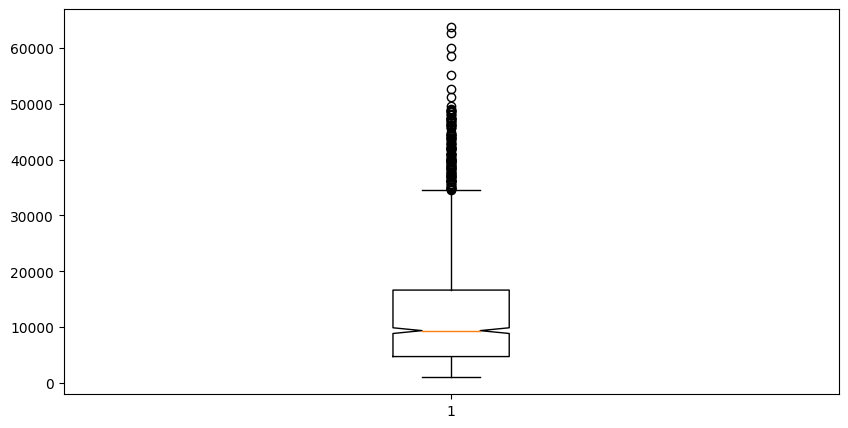

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv('/content/drive/MyDrive/work/insurance.csv', index_col=0)
print(insurance.head())
print(insurance.describe)
print(insurance.shape)
print(insurance.info())
print(insurance.dtypes)
m = insurance.charges.mean()
n = insurance.charges.std()
print('납입 보험료 평균: ', end=''); print(m)
print('납입 보험료 표준편차: ', end=''); print(n)
upper =m+1.5*n
print('이상값 상한 기준: ', end=''); print(upper)
cond = insurance.charges >= upper
hap = insurance[cond].charges.sum()
print('이상값(charges) 합계: ', end=''); print(format(round(hap, 4), ','))
print('납입 보험료 합계(원): ', end=''); print(format(round(insurance.charges.sum(), 4), ','))

print('Boxplot')
plt.figure(figsize=(10,5))
plt.boxplot(insurance.charges, notch=True)
plt.show()

- df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category'): 정수형을 범주형으로 변환
- df['Warehouse_block'] = df['Warehouse_block'].map({'A':0, 'B':1, 'C':2, 'D':3, 'F':4}): 문자열(object)을 정수형(범주형)으로 변환
- x = df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy(): 독립변수(넘파이 자료 변환)
- y = df['Reached.on.Time_Y.N'].to_numpy(): 종속변수(넘파이 자료 변환)
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42): (훈련,검증) 데이터세트 랜덤 추출
- scaler = StandardScaler(): 데이터 표준화
- model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42): SVM 모형 구축
- model.fit(xtrainscaled, trainy): 모형 학습
- ypred = model.predict(xtestscaled): 검증 데이터세트 예측

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
df['Warehouse_block'] = df['Warehouse_block'].map({'A':0, 'B':1, 'C':2, 'D':3, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight':0, 'Road':1, 'Ship':2})
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
print(df.head())
x = df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
accuracy = accuracy_score(testy, ypred)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)
print('$$$ 혼동행렬, Confusion Matrix $$$')
print(confusion_matrix(testy, ypred))
print('** 성능평가 지표값 **')
print(classification_report(testy, ypred))
resultsvm = pd.DataFrame(np.zeros((3300, 2)), columns=['Actual', 'Prediction'])
resultsvm['Actual'] = pd.DataFrame(testy)
resultsvm['Prediction'] = pd.DataFrame(ypred)
print(resultsvm.head())
from google.colab import drive
drive.mount('/content/drive')
resultsvm.to_csv('/content/drive/MyDrive/work/resulttrain2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
    Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                            
1                 3                 0                    4                2   
2                 4                 0                    4                5   
3                 0                 0                    2                2   
4                 1                 0                    3                3   
5                 2                 0                

Mounted at /content/drive
*** F1 Score 계산 모듈 이용 ***
F1 Score: 0.6726913301327309
*** Accuracy 계산 모듈 이용 ***
Accuracy (정확도): 0.6487878787878788
*** Precision 계산 모듈 이용 ***
Precision (정밀도): 0.7669027688345138
*** Recall 계산 모듈 이용 ***
Recall (재현율): 0.5990945674044266
^^^ ROC Curve ^^^


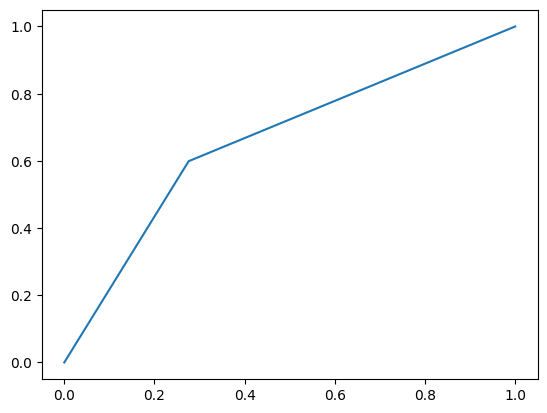

** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.6615899666290426


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
df['Warehouse_block'] = df['Warehouse_block'].map({'A':0, 'B':1, 'C':2, 'D':3, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight':0, 'Road':1, 'Ship':2})
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
x = df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
print('*** F1 Score 계산 모듈 이용 ***')
print('F1 Score: ', end=''); print(f1_score(testy, ypred))
print('*** Accuracy 계산 모듈 이용 ***')
print('Accuracy (정확도): ', end='');
print(accuracy_score(testy, ypred))
print('*** Precision 계산 모듈 이용 ***')
print('Precision (정밀도): ', end=''); print(precision_score(testy, ypred))
print('*** Recall 계산 모듈 이용 ***')
print('Recall (재현율): ', end=''); print(recall_score(testy, ypred))
print('^^^ ROC Curve ^^^')
fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr); plt.show()
print('** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

- country = data.dropna(): 결측값 제외
- q7 = country['Guam'], quantile(0.3): Guam 자료에 대한 상위 70%(하위 30%) 값

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work/country.csv', header=0)
country = data.dropna()
print(country.head())
print(country.describe())
print(country.shape)
print(country.info())
print(country.dtypes)
print(country.index)

q7 = country['Guam'].quantile(0.3)
print('Guam 자료에 대한 상위 70%(하위 30%) 값(결핵 환자 수(명)): ', end=''); print(q7)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   year  Ghana  Guam  Greece  Russia  China  Peru  France
0  1990  356.0  20.0      27     156  340.0  35.0    22.0
1  1991  400.0  25.0      45     200  250.0  45.0    35.0
2  1992  350.0  30.0      32     250  150.0  35.0    21.0
3  1993  200.0  20.0      32     100  200.0  20.0    24.0
4  1994  250.0  25.0      35     150  230.0  35.0    23.0
              year       Ghana       Guam     Greece      Russia       China  \
count    10.000000   10.000000  10.000000  10.000000   10.000000   10.000000   
mean   1997.200000  321.600000  23.300000  33.000000  152.300000  284.000000   
std       5.750362   65.549303   4.715224   6.497863   45.377552   95.358971   
min    1990.000000  200.000000  15.000000  20.000000  100.000000  150.000000   
25%    1992.250000  300.000000  20.000000  32.000000  126.750000  207.500000   
50%    1997.000000  320.000000  24.000000  

- df = country[coutry['year']==2000]: 연도 = 2000인 데이터프레임
- dfnew = df.iloc[:, 1:8]: year 컬럼 제외
- meangap = dfnew.mean(axis=1): 7개 국가들에 대한 평균 결핵환자 수(명)
- dfnew[dfnew>float(meangap)].count().sum(): 평균보다 큰 값을 갖는 국가의 수(국가)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work/country.csv', header=0)
country = data.dropna()
print(country.head())
print(country.describe())
print(country.shape)
print(country.info())
print(country.dtypes)
print(country.index)

print('******************************')
df = country[country['year']==2000]
dfnew = df.iloc[:, 1:8]
print('2000년도 7개 국가들에 대한 결핵환자 데이터'); print(dfnew)
print('2000년도 7개 국가들에 대한 결핵환자 데이터의 자료 구조: ', end=''); print(type(dfnew))

meangap = dfnew.mean(axis=1)
print('7개 국가 평균 결핵 환자수(명): ', end=''); print(meangap)
print(type(meangap))
print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
print(dfnew>float(meangap))
print('평균보다 큰 값을 가지는 국가의 수(국가): ', end=''); print(dfnew[dfnew>float(meangap)].count().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   year  Ghana  Guam  Greece  Russia  China  Peru  France
0  1990  356.0  20.0      27     156  340.0  35.0    22.0
1  1991  400.0  25.0      45     200  250.0  45.0    35.0
2  1992  350.0  30.0      32     250  150.0  35.0    21.0
3  1993  200.0  20.0      32     100  200.0  20.0    24.0
4  1994  250.0  25.0      35     150  230.0  35.0    23.0
              year       Ghana       Guam     Greece      Russia       China  \
count    10.000000   10.000000  10.000000  10.000000   10.000000   10.000000   
mean   1997.200000  321.600000  23.300000  33.000000  152.300000  284.000000   
std       5.750362   65.549303   4.715224   6.497863   45.377552   95.358971   
min    1990.000000  200.000000  15.000000  20.000000  100.000000  150.000000   
25%    1992.250000  300.000000  20.000000  32.000000  126.750000  207.500000   
50%    1997.000000  320.000000  24.000000  

<ipython-input-3-80bf7ccb868b>:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(dfnew>float(meangap))
<ipython-input-3-80bf7ccb868b>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('평균보다 큰 값을 가지는 국가의 수(국가): ', end=''); print(dfnew[dfnew>float(meangap)].count().sum())


- result = data.isnull().sum(): 컬럼별로 결측 데이터 개수 저장
- result_sort = result.sort_values(ascending=False): 결측값 개수 내림차순 정렬
- result_sort.index[0]: 결측값이 가장 많은 나라
- result[result_sort.index[0]]: 결측값이 가장 많은 나라의 결측값 개수

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work/country.csv', header=0, index_col='year')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

result = data.isnull().sum()
print('*****컬럼별 결측 데이터 개수*****')
print(result)
print(type(result))

print('결측 데이터 개수 내림차순 정렬')
result_sort = result.sort_values(ascending=False)
print(result_sort)
print('결측 데이터가 가장 많은 나라: ', end=''); print(result_sort.index[0])
print('결측 데이터가 가장 많은 나라의 결측값 개수: ', end=''); print(result[result_sort.index[0]])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Ghana  Guam  Greece  Russia  China  Peru  France
year                                                  
1990  356.0  20.0      27     156  340.0  35.0    22.0
1991  400.0  25.0      45     200  250.0  45.0    35.0
1992  350.0  30.0      32     250  150.0  35.0    21.0
1993  200.0  20.0      32     100  200.0  20.0    24.0
1994  250.0  25.0      35     150  230.0  35.0    23.0
           Ghana       Guam     Greece      Russia       China       Peru  \
count   15.00000  14.000000  16.000000   16.000000   15.000000  15.000000   
mean   296.40000  24.428571  34.062500  162.062500  281.333333  37.533333   
std     76.92371   5.330814   6.516326   50.403001   87.248960   8.219026   
min    140.00000  15.000000  20.000000  100.000000  150.000000  20.000000   
25%    250.00000  20.250000  31.500000  130.000000  215.000000  33.500000   
50%    300.00000  24.000

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
print(X[:5])
print(iris.feature_names)
print(iris.target_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


- x = iris.data: 독립변수 [꽃받침의 길이(Sepal.Length), 꽃받침의 너비(Sepal.Width), 꽃잎의 길이(Petal.Length), 꽃잎의 너비(Petal.Width)]
- y = iris.target: 종속변수(붓꽃의 품종)
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55): (훈련, 검증) 데이터세트 랜덤 추출
- scaler = StandardScaler(): 데이터 표준화
- model = DecisionTreeClassifier(random_state=55): 의사결정나무 모형 구축
- results = model.fit(trainx_scale, trainy): 모형 적합(훈련)
- model.score(testx_scale, testy): 검증 데이터에 대한 정확도

의사결정나무 분석모형 성능(정확도(%), 훈련 데이터세트): 100.0
의사결정나무 분석모형 성능(정확도(%), 검증 데이터세트): 95.55555555555556
특성 중요도: [0.0214344  0.         0.42063137 0.55793422]


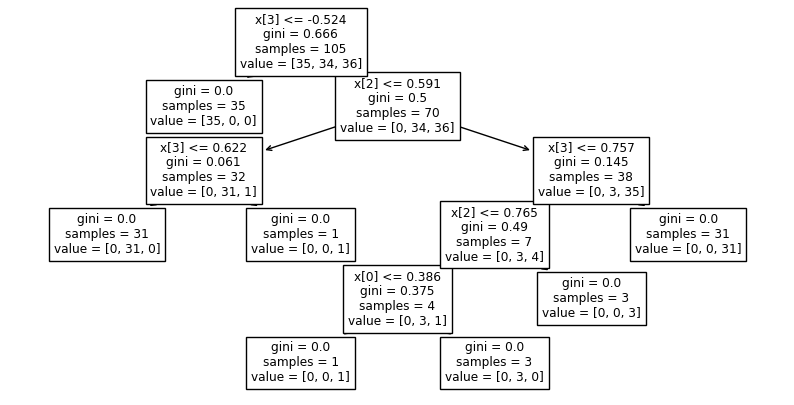

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
iris=load_iris()
x = iris.data
y = iris.target
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = DecisionTreeClassifier(random_state=55)
results = model.fit(trainx_scale, trainy)
print('의사결정나무 분석모형 성능(정확도(%), 훈련 데이터세트): ', end=''); print(100*model.score(trainx_scale, trainy))
print('의사결정나무 분석모형 성능(정확도(%), 검증 데이터세트): ', end=''); print(100*model.score(testx_scale, testy))
print('특성 중요도: ', end=''); print(model.feature_importances_)
plt.figure(figsize=(10,5))
plot_tree(model)
plt.show()

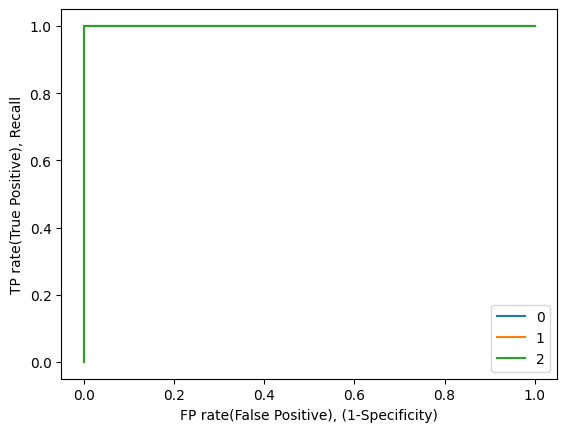

Class=0 분류(setosa) 성능에 대한 AUC: 1.0
Class=1 분류(versicolor) 성능에 대한 AUC: 1.0
Class=2 분류(virginica) 성능에 대한 AUC: 1.0


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
iris = load_iris()
x = iris.data
y = label_binarize(iris.target, classes=[0,1,2])

fpr = [None]*3
tpr = [None]*3
thr = [None]*3

for i in range(3):
  model = DecisionTreeClassifier(random_state=55).fit(x,y[:,i])
  fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(x)[:,1])
  plt.plot(fpr[i], tpr[i], label=i)

plt.xlabel('FP rate(False Positive), (1-Specificity)')
plt.ylabel('TP rate(True Positive), Recall')
plt.legend()
plt.show()

print('Class=0 분류(setosa) 성능에 대한 AUC: ', end=''); print(auc(fpr[0], tpr[0]))
print('Class=1 분류(versicolor) 성능에 대한 AUC: ', end=''); print(auc(fpr[1], tpr[1]))
print('Class=2 분류(virginica) 성능에 대한 AUC: ', end=''); print(auc(fpr[2], tpr[2]))

- model = SVC(kernel = 'sigmoid', C=10, gamma=0.1, random_state=42): 서포트벡터머신 분류 모형 정의
- model.fit(xtrainscaled, trainy): 훈련 데이터 적합(학습)
- ypred = model.predict(xtestscaled): 검증 데이터에 대한 예측 결과 저장

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris = load_iris()
x = iris.data
y = iris.target
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
xscaler = StandardScaler()
xtrainscaled = xscaler.fit_transform(trainx)
xtestscaled = xscaler.fit_transform(testx)

model = SVC(kernel = 'sigmoid', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)

accuracy = accuracy_score(testy, ypred)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)

print('$$$ 혼동행렬, Confusion Matrix $$$')
print(confusion_matrix(testy, ypred))
print('** 성능평가 지표값 **')
print(classification_report(testy, ypred))

resultsvm = pd.DataFrame(np.zeros((45, 2)), columns=['Actual', 'Prediction'])
resultsvm['Actual'] = pd.DataFrame(testy)
resultsvm['Prediction'] = pd.DataFrame(ypred)
print(resultsvm.head())

SVM 모형의 성능(정확도): 0.9333333333333333
$$$ 혼동행렬, Confusion Matrix $$$
[[19  0  0]
 [ 0 10  3]
 [ 0  0 13]]
** 성능평가 지표값 **
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.77      0.87        13
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45

   Actual  Prediction
0       1           1
1       0           0
2       2           2
3       1           2
4       1           2


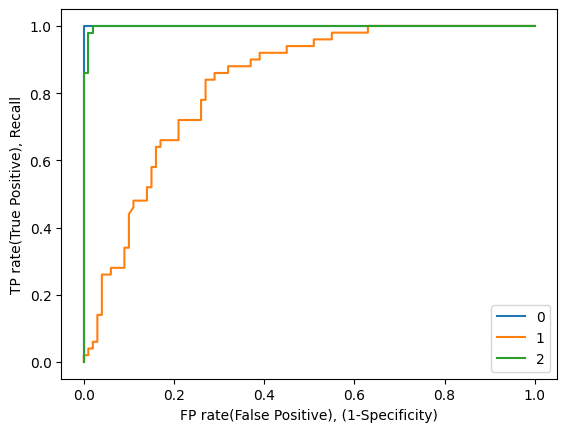

Class=0 분류(setosa) 성능에 대한 AUC: 1.0
Class=1 분류(versicolor) 성능에 대한 AUC: 0.8291
Class=2 분류(virginica) 성능에 대한 AUC: 0.9984


In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
iris = load_iris()
x = iris.data
y = label_binarize(iris.target, classes=[0,1,2])

fpr=[None]*3
tpr=[None]*3
thr=[None]*3

for i in range(3):
  model = SVC(probability=True, kernel='linear', C=10, gamma=0.1, random_state=42).fit(x,y[:,i])
  fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(x)[:,1])
  plt.plot(fpr[i], tpr[i], label=i)

plt.xlabel('FP rate(False Positive), (1-Specificity)')
plt.ylabel('TP rate(True Positive), Recall')
plt.legend()
plt.show()

print('Class=0 분류(setosa) 성능에 대한 AUC: ', end=''); print(auc(fpr[0], tpr[0]))
print('Class=1 분류(versicolor) 성능에 대한 AUC: ', end=''); print(auc(fpr[1], tpr[1]))
print('Class=2 분류(virginica) 성능에 대한 AUC: ', end=''); print(auc(fpr[2], tpr[2]))